In [34]:
# 필수 라이브러리
import pandas as pd
import numpy as np
import random
import tensorflow as tf

In [35]:
data = pd.read_csv('./data/wine_train.csv')
data.shape

(5497, 14)

In [36]:
data[:3]

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white


In [37]:
data['quality'].value_counts()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

In [38]:
data.type

0       white
1         red
2       white
3       white
4       white
        ...  
5492    white
5493    white
5494    white
5495    white
5496    white
Name: type, Length: 5497, dtype: object

In [39]:
data.type.value_counts()

white    4159
red      1338
Name: type, dtype: int64

In [40]:
from tensorflow.keras.utils import to_categorical

In [41]:
## 딥러닝 기본에서는 target이 명목형인 경우, dummy로 만들어주어야 한다.(one-hot인코딩)

In [42]:
y_data = to_categorical(data['quality'] - 3)
y_data[:3] #target

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [43]:
X_data = data.loc[:, 'fixed acidity':]
X_data[:3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white


In [44]:
X_data.shape, y_data.shape

((5497, 12), (5497, 7))

In [45]:
X_data['type'] = np.where(data['type'] == 'white', 1, 0).astype('int')
X_data['type'].value_counts()

1    4159
0    1338
Name: type, dtype: int64

In [46]:
##min-max scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)

In [47]:
X_data_scaled[:3]

array([[0.14876033, 0.41      , 0.03614458, 0.09509202, 0.05490849,
        0.02777778, 0.1797235 , 0.13900135, 0.5511811 , 0.12359551,
        0.31884058, 1.        ],
       [0.41322314, 0.35333333, 0.08433735, 0.02760736, 0.09650582,
        0.03125   , 0.08294931, 0.18874108, 0.35433071, 0.20786517,
        0.2173913 , 0.        ],
       [0.33884298, 0.08666667, 0.23493976, 0.02147239, 0.07986689,
        0.06944444, 0.30414747, 0.08964719, 0.24409449, 0.16853933,
        0.42028986, 1.        ]])

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=100)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4397, 12) (4397, 7)
(1100, 12) (1100, 7)


In [50]:
# 모델생성
# 심층 신경망 모델
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [53]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=12))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(7, activation='softmax'))

2022-06-07 15:59:15.289971: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [54]:
## 이 모델로 설정을 하겠음(compile)
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['acc', 'mae']
             )

In [55]:
## 설정한 레이어들 요약해서 보여주세요.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
 dense_4 (Dense)             (None, 7)                 77        
                                                                 
Total params: 12,407
Trainable params: 12,407
Non-trainable params: 0
_________________________________________________________________


In [58]:
history = model.fit(X_train, y_train, epochs=200, batch_size=50, verbose=2)
history

Epoch 1/200
88/88 - 0s - loss: 0.8039 - acc: 0.6557 - mae: 0.1320 - 85ms/epoch - 968us/step
Epoch 2/200
88/88 - 0s - loss: 0.7932 - acc: 0.6652 - mae: 0.1306 - 79ms/epoch - 900us/step
Epoch 3/200
88/88 - 0s - loss: 0.8064 - acc: 0.6577 - mae: 0.1322 - 75ms/epoch - 856us/step
Epoch 4/200
88/88 - 0s - loss: 0.7887 - acc: 0.6686 - mae: 0.1299 - 71ms/epoch - 802us/step
Epoch 5/200
88/88 - 0s - loss: 0.7950 - acc: 0.6643 - mae: 0.1306 - 70ms/epoch - 796us/step
Epoch 6/200
88/88 - 0s - loss: 0.7874 - acc: 0.6700 - mae: 0.1291 - 70ms/epoch - 794us/step
Epoch 7/200
88/88 - 0s - loss: 0.7933 - acc: 0.6720 - mae: 0.1302 - 70ms/epoch - 791us/step
Epoch 8/200
88/88 - 0s - loss: 0.7911 - acc: 0.6641 - mae: 0.1300 - 68ms/epoch - 769us/step
Epoch 9/200
88/88 - 0s - loss: 0.7851 - acc: 0.6668 - mae: 0.1293 - 70ms/epoch - 793us/step
Epoch 10/200
88/88 - 0s - loss: 0.7823 - acc: 0.6739 - mae: 0.1289 - 66ms/epoch - 753us/step
Epoch 11/200
88/88 - 0s - loss: 0.7821 - acc: 0.6686 - mae: 0.1287 - 68ms/epoch

In [ ]:
## 401 epoch를 학습시킨 후,(트레인 데이터의 학습 결과)
## loss: 0.5395 - acc: 0.7876 - mae: 0.0895

In [61]:
## 테스트 데이터의 학습 결과를 비교해보자!!
## acc: train < test
test_result = model.evaluate(X_test, y_test)
test_result

35/35 [==============================] - 0s 1ms/step - loss: 1.3373 - acc: 0.6009 - mae: 0.1312


[1.3373371362686157, 0.6009091138839722, 0.131185844540596]

In [ ]:
## overfitting되었음.
## train=> loss: 0.5395 - acc: 0.7876 - mae: 0.0895
## test=> loss: 1.3373 - acc: 0.6009 - mae: 0.1312
## loss(적): train < test  
## acc(큰): train > test
## mae(적): train < test

In [62]:
## 다중분류에서는 predict를 할 때 각 항목이 될 가능성을 계산해준다.
y_pred = model.predict(X_test)
y_pred[0]

array([2.7648223e-13, 2.5243923e-08, 2.6809075e-04, 1.5089465e-02,
       9.5402467e-01, 3.0617286e-02, 5.0702664e-07], dtype=float32)

In [64]:
y_pred0_index = np.argmax(y_pred[0]) 
y_pred0_index + 3

7

In [68]:
y_test[0][5:]

array([1., 0.], dtype=float32)

In [70]:
len(y_pred)

1100

In [71]:
y_pred.shape

(1100, 7)

In [72]:
y_pred_test = np.argmax(y_pred, axis= -1) + 3
y_pred_test

array([7, 6, 6, ..., 6, 6, 7])

In [76]:
y_test_ = np.argmax(y_test, axis= -1) + 3
y_test_

array([8, 5, 5, ..., 6, 7, 8])

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print(accuracy_score(y_test_, y_pred_test))
print(confusion_matrix(y_test_, y_pred_test))

0.600909090909091
[[  0   0   1   0   0   0   0]
 [  2   9  22   8   0   0   0]
 [  3   6 239  93   5   0   0]
 [  1   5 107 337  41   2   0]
 [  0   0   5 104  70   6   0]
 [  0   1   0  10  14   6   0]
 [  0   0   0   0   2   1   0]]


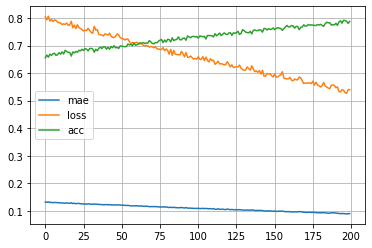

In [82]:
## 시각화!
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.legend(['mae', 'loss', 'acc'])
plt.grid()
plt.show()